In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [27]:
CLIENT_ID = 'CACDQHLNH5HPGXABPCBGN515KKOMGU4T3NHHPVZB0K1S5CZY' # your Foursquare ID
CLIENT_SECRET = 'HXLSKL0CIJDOXGV0Z1EA1BL3I1IEMV2LXDV40DLGUF5RF3FM' # your Foursquare Secret
VERSION = '20190722'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CACDQHLNH5HPGXABPCBGN515KKOMGU4T3NHHPVZB0K1S5CZY
CLIENT_SECRET: HXLSKL0CIJDOXGV0Z1EA1BL3I1IEMV2LXDV40DLGUF5RF3FM


In [3]:
address1 = '200 Boylston St, Boston, MA 02116'
geolocator = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print(latitude1, longitude1)

42.3520495 -71.068135705234


In [4]:
address2 = '900 Boulevard René-Lévesque O, Montréal, QC H3B 4A5'

geolocator = Nominatim(user_agent="foursquare_agent")
location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print(latitude2, longitude2)

45.4673092 -73.5382863


In [33]:
search_query = 'Breakfast'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df1 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df1['categories'] = df1.apply(get_category_type, axis=1)

df1.columns = [column.split('.')[-1] for column in df1.columns]
df1

Breakfast .... OK!


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,The Riverbend Bed And Breakfast,Bed & Breakfast,1 Sparks St,US,Cambridge,United States,Mt Auburn St,5719,"[1 Sparks St (Mt Auburn St), Cambridge, MA 021...","[{'label': 'display', 'lat': 42.37471440425744...",42.374714,-71.130546,NaN,02138,MA,4e07fce7b0fbba5eee1fbf3c
1,Encore Bed and Breakfast,Bed & Breakfast,NaN,US,Boston,United States,NaN,1364,"[Boston, MA 02118, United States]","[{'label': 'display', 'lat': 42.341647, 'lng':...",42.341647,-71.076897,NaN,02118,MA,4fd12e77e4b0d87d3536a8cb
2,82 Chandler Bed & Breakfast,Bed & Breakfast,82 Chandler St,US,Boston,United States,NaN,644,"[82 Chandler St, Boston, MA 02116, United States]","[{'label': 'display', 'lat': 42.34663800551888...",42.346638,-71.070916,NaN,02116,MA,4aed0680f964a520cccc21e3
3,Dempsey's Breakfast and Lunch,American Restaurant,64 Lambert St,US,Medford,United States,Salem St,8163,"[64 Lambert St (Salem St), Medford, MA 02155, ...","[{'label': 'display', 'lat': 42.42338953987098...",42.423390,-71.091113,NaN,02155,MA,4b6d76c1f964a52023762ce3
4,Oasis Guest House Bed and Breakfast Boston,Bed & Breakfast,22 Edgerly Rd,US,Boston,United States,NaN,1768,"[22 Edgerly Rd, Boston, MA 02115, United States]","[{'label': 'display', 'lat': 42.34581099190836...",42.345811,-71.087906,NaN,02115,MA,4be1b3658dd062b5c27c3e3c
5,Breakfast @ Holiday Inn,Breakfast Spot,NaN,US,Somerville,United States,NaN,3484,"[Somerville, MA 02143, United States]","[{'label': 'display', 'lat': 42.38175, 'lng': ...",42.381750,-71.081532,NaN,02143,MA,5b8152afc97f280039c62a43
6,The Breakfast Club,Diner,270 Western Ave,US,Allston,United States,btwn Everett & Riverdale,5525,"[270 Western Ave (btwn Everett & Riverdale), A...","[{'label': 'display', 'lat': 42.36332582163935...",42.363326,-71.133548,North Allston,02134,MA,4a842be1f964a520d8fb1fe3
7,St Athony Shrine Breakfast,Breakfast Spot,NaN,US,Boston,United States,NaN,898,"[Boston, MA 02108, United States]","[{'label': 'display', 'lat': 42.35589968758315...",42.355900,-71.058531,NaN,02108,MA,507ac71de4b0b6155ae4b3d8
8,Harry's All-American Breakfast,Breakfast Spot,1420 Centre St,US,Roslindale,United States,NaN,8586,"[1420 Centre St, Roslindale, MA 02131, United ...","[{'label': 'display', 'lat': 42.29382478811963...",42.293825,-71.136567,NaN,02131,MA,4cb9bd9b9552b60cb15ad58b
9,Breakfast @ Element,Breakfast Spot,NaN,US,Boston,United States,NaN,2104,"[Boston, MA 02210, United States]","[{'label': 'display', 'lat': 42.343144, 'lng':...",42.343144,-71.045567,NaN,02210,MA,57e12922498eddcb01b722a2


In [34]:
search_query = 'Lunch'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df2 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df2['categories'] = df2.apply(get_category_type, axis=1)

df2.columns = [column.split('.')[-1] for column in df2.columns]

df2

Lunch .... OK!


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sal's Lunch,Sandwich Place,31 Thacher St,US,Boston,United States,at Thacher Ct.,1703,"[31 Thacher St (at Thacher Ct.), Boston, MA 02...","[{'label': 'display', 'lat': 42.36534577219623...",42.365346,-71.057889,02113,MA,4bf188efd39ad13a205aaa0e
1,Women's Lunch Place,Building,67 Newbury St,US,Boston,United States,NaN,464,"[67 Newbury St, Boston, MA 02116, United States]","[{'label': 'display', 'lat': 42.35209648300471...",42.352096,-71.073777,02116,MA,4d3ac61897e0a1cde448713e
2,Lunch Room,Cafeteria,179 Lincoln St,US,Boston,United States,NaN,775,"[179 Lincoln St, Boston, MA 02111, United States]","[{'label': 'display', 'lat': 42.35029409034235...",42.350294,-71.059013,02111,MA,4d6fd5430187236acbdba1ba
3,The Women's Lunch Place,Women's Store,67 Newbury St,US,Boston,United States,NaN,655,"[67 Newbury St, Boston, MA 02116, United States]","[{'label': 'display', 'lat': 42.35131713118323...",42.351317,-71.076042,02116,MA,55559f00498e08dc05a4fe75
4,Delicious Chinese Lunch Box,Food Truck,NaN,US,Boston,United States,NaN,1063,"[Boston, MA 02116, United States]","[{'label': 'display', 'lat': 42.35312711672380...",42.353127,-71.080984,02116,MA,503672c4e4b0bb9297dd8e61
5,Hisgen Lunch Room,None,NaN,US,NaN,United States,NaN,701,"[Massachusetts, United States]","[{'label': 'display', 'lat': 42.350214, 'lng':...",42.350214,-71.076291,NaN,Massachusetts,4da5c933cda1c55f755da69f
6,Lunch Trucks,Food Truck,NaN,US,Boston,United States,NaN,1238,"[Boston, MA, United States]","[{'label': 'display', 'lat': 42.359785, 'lng':...",42.359785,-71.057317,NaN,MA,517aa87be4b06123f7553897
7,Lunch Dates,None,800 Boylston St Fl 16,US,Boston,United States,NaN,1419,"[800 Boylston St Fl 16, Boston, MA 02199, Unit...","[{'label': 'display', 'lat': 42.34840318907146...",42.348403,-71.084676,02199,MA,513f0803582f40aa8843514a
8,28 State 13th Floor Lunch Room,Corporate Amenity,28 State St,US,Boston,United States,NaN,1185,"[28 State St, Boston, MA 02109, United States]","[{'label': 'display', 'lat': 42.35937, 'lng': ...",42.359370,-71.057664,02109,MA,5bbcdab9c21cb1002c53f2e0
9,Lunch Box,Breakfast Spot,350 Main St,US,Malden,United States,NaN,8127,"[350 Main St, Malden, MA 02148, United States]","[{'label': 'display', 'lat': 42.425057, 'lng':...",42.425057,-71.067728,02148,MA,4c28c3603492a593d0d3b728


In [35]:
search_query = 'Dinner'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df3 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df3['categories'] = df3.apply(get_category_type, axis=1)

df3.columns = [column.split('.')[-1] for column in df3.columns]

df3

Dinner .... OK!


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Dinner Detective Murder Mystery Show Boston,General Entertainment,30 Washington St,US,Somerville,United States,3436,"[30 Washington St, Somerville, MA 02143, Unite...","[{'label': 'display', 'lat': 42.38124924999845...",42.381249,-71.081712,02143,MA,546584cc498e07ba313c46fd
1,Dinner Zoo,Other Nightlife,Faneuil Hall,US,Boston,United States,1352,"[Faneuil Hall, Boston, MA 02109, United States]","[{'label': 'display', 'lat': 42.36008193041947...",42.360082,-71.055804,02109,MA,4e762cee814ddff25ef6ae72
2,St Anthony Shrine Dinner,Restaurant,NaN,US,Boston,United States,840,"[Boston, MA 02108, United States]","[{'label': 'display', 'lat': 42.35467043934042...",42.354670,-71.058555,02108,MA,50452894e4b003d2d47d0d65
3,Dinner On The Greenway,Food Truck,Dewey Square,US,Boston,United States,1411,"[Dewey Square, Boston, MA 02210, United States]","[{'label': 'display', 'lat': 42.33956794603548...",42.339568,-71.065089,02210,MA,4e55763345dd0a4826e68f2d
4,Dinner with live Entertainment,University,50 Broadway,US,Cambridge,United States,1909,"[50 Broadway, Cambridge, MA, United States]","[{'label': 'display', 'lat': 42.36301514966871...",42.363015,-71.085985,NaN,MA,4e7b3cd681dc94cc739f715b
5,Boston Girl Geek Dinner 5,Event Space,8 Cambridge Ctr,US,Cambridge,United States,2191,"[8 Cambridge Ctr, Cambridge, MA 02142, United ...","[{'label': 'display', 'lat': 42.36424620859648...",42.364246,-71.089045,02142,MA,5238e1e2498ef96b33559fc5
6,Cocktail reception and dinner buffet,College & University,575 Memorial Dr,US,Cambridge,United States,3018,"[575 Memorial Dr, Cambridge, MA 02139, United ...","[{'label': 'display', 'lat': 42.353554, 'lng':...",42.353554,-71.104768,02139,MA,4da75509fa8c4175d09f61e4
7,Bus to campus for dinner,College & University,575 Memorial Dr,US,Cambridge,United States,3031,"[575 Memorial Dr, Cambridge, MA 02139, United ...","[{'label': 'display', 'lat': 42.3538049, 'lng'...",42.353805,-71.104910,02139,MA,4da7550f4df0260c3ea5c029
8,Cocktails and Dinner with Enid Starr R'51,College & University,575 Memorial Dr,US,Cambridge,United States,3031,"[575 Memorial Dr, Cambridge, MA 02139, United ...","[{'label': 'display', 'lat': 42.3538049, 'lng'...",42.353805,-71.104910,02139,MA,4da755298154fe28a8e4846d
9,Spirit of Boston,Harbor / Marina,200 Seaport Boulevard,US,Boston,United States,2286,"[200 Seaport Boulevard, Boston, MA 02210, Unit...","[{'label': 'display', 'lat': 42.35151795, 'lng...",42.351518,-71.040354,02210,MA,4bad61d9f964a5203e4c3be3


In [36]:
search_query = 'Restaurant'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df4 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df4['categories'] = df4.apply(get_category_type, axis=1)

df4.columns = [column.split('.')[-1] for column in df4.columns]

df4

Restaurant .... OK!


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Q Restaurant,Hotpot Restaurant,660 Washington St,US,Boston,United States,at Beach St.,447,"[660 Washington St (at Beach St.), Boston, MA ...","[{'label': 'display', 'lat': 42.35170662953259...",42.351707,-71.062715,NaN,02111,MA,4c91546ab641236ab6a68079
1,New Dong Khanh Restaurant,Vietnamese Restaurant,83 Harrison Ave,US,Boston,United States,NaN,567,"[83 Harrison Ave, Boston, MA 02111, United Sta...","[{'label': 'display', 'lat': 42.35087764731717...",42.350878,-71.061420,NaN,02111,MA,4a90a894f964a520011920e3
2,Montien Boston - Thai Restaurant,Thai Restaurant,63 Stuart St,US,Boston,United States,Tremont St,317,"[63 Stuart St (Tremont St), Boston, MA 02116, ...","[{'label': 'display', 'lat': 42.35109416020406...",42.351094,-71.064498,NaN,02116,MA,4a04e5aff964a5203e721fe3
3,Great Taste Bakery & Restaurant,Bakery,31 Beach St,US,Boston,United States,NaN,661,"[31 Beach St, Boston, MA 02111, United States]","[{'label': 'display', 'lat': 42.35129067813932...",42.351291,-71.060165,NaN,02111,MA,4ae310cef964a520399021e3
4,New Jumbo Seafood Restaurant,Chinese Restaurant,5 Hudson St,US,Boston,United States,NaN,689,"[5 Hudson St, Boston, MA 02111, United States]","[{'label': 'display', 'lat': 42.35090215936083...",42.350902,-71.059895,NaN,02111,MA,4b08321cf964a520ff0523e3
5,Moon Villa Restaurant,Chinese Restaurant,19 Edinboro St,US,Boston,United States,Near Beach St.,706,"[19 Edinboro St (Near Beach St.), Boston, MA 0...","[{'label': 'display', 'lat': 42.35188354712937...",42.351884,-71.059554,NaN,02111,MA,4bb21286f964a52094b63ce3
6,Thornton's Restaurant & Cafe,Diner,150 Huntington Ave,US,Boston,United States,at W Newton St,1367,"[150 Huntington Ave (at W Newton St), Boston, ...","[{'label': 'display', 'lat': 42.34528762816119...",42.345288,-71.082010,NaN,02115,MA,4aec58d2f964a52035c621e3
7,Toro Restaurant,Tapas Restaurant,1704 Washington St,US,Boston,United States,at Massachusetts Ave,1791,"[1704 Washington St (at Massachusetts Ave), Bo...","[{'label': 'display', 'lat': 42.33705335302252...",42.337053,-71.076043,NaN,02118,MA,43e9e7eff964a520202f1fe3
8,Rock Bottom Restaurant and Brewery,Brewery,115 Stuart St,US,Boston,United States,at Tremont St,244,"[115 Stuart St (at Tremont St), Boston, MA 021...","[{'label': 'display', 'lat': 42.35132917094021...",42.351329,-71.065327,NaN,02116,MA,4a3408e3f964a5209a9b1fe3
9,Primo's Restaurant,Pizza Place,28 Myrtle St,US,Boston,United States,NaN,836,"[28 Myrtle St, Boston, MA 02114, United States]","[{'label': 'display', 'lat': 42.35932373996034...",42.359324,-71.065583,NaN,02114,MA,4aa91a1af964a520fe5120e3


In [37]:
frames = [df1, df2, df3, df4]

df5 = pd.concat(frames, sort = False)
df5 = df5.reset_index(drop=True)
df5

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,The Riverbend Bed And Breakfast,Bed & Breakfast,1 Sparks St,US,Cambridge,United States,Mt Auburn St,5719,"[1 Sparks St (Mt Auburn St), Cambridge, MA 021...","[{'label': 'display', 'lat': 42.37471440425744...",42.374714,-71.130546,NaN,02138,MA,4e07fce7b0fbba5eee1fbf3c
1,Encore Bed and Breakfast,Bed & Breakfast,NaN,US,Boston,United States,NaN,1364,"[Boston, MA 02118, United States]","[{'label': 'display', 'lat': 42.341647, 'lng':...",42.341647,-71.076897,NaN,02118,MA,4fd12e77e4b0d87d3536a8cb
2,82 Chandler Bed & Breakfast,Bed & Breakfast,82 Chandler St,US,Boston,United States,NaN,644,"[82 Chandler St, Boston, MA 02116, United States]","[{'label': 'display', 'lat': 42.34663800551888...",42.346638,-71.070916,NaN,02116,MA,4aed0680f964a520cccc21e3
3,Dempsey's Breakfast and Lunch,American Restaurant,64 Lambert St,US,Medford,United States,Salem St,8163,"[64 Lambert St (Salem St), Medford, MA 02155, ...","[{'label': 'display', 'lat': 42.42338953987098...",42.423390,-71.091113,NaN,02155,MA,4b6d76c1f964a52023762ce3
4,Oasis Guest House Bed and Breakfast Boston,Bed & Breakfast,22 Edgerly Rd,US,Boston,United States,NaN,1768,"[22 Edgerly Rd, Boston, MA 02115, United States]","[{'label': 'display', 'lat': 42.34581099190836...",42.345811,-71.087906,NaN,02115,MA,4be1b3658dd062b5c27c3e3c
5,Breakfast @ Holiday Inn,Breakfast Spot,NaN,US,Somerville,United States,NaN,3484,"[Somerville, MA 02143, United States]","[{'label': 'display', 'lat': 42.38175, 'lng': ...",42.381750,-71.081532,NaN,02143,MA,5b8152afc97f280039c62a43
6,The Breakfast Club,Diner,270 Western Ave,US,Allston,United States,btwn Everett & Riverdale,5525,"[270 Western Ave (btwn Everett & Riverdale), A...","[{'label': 'display', 'lat': 42.36332582163935...",42.363326,-71.133548,North Allston,02134,MA,4a842be1f964a520d8fb1fe3
7,St Athony Shrine Breakfast,Breakfast Spot,NaN,US,Boston,United States,NaN,898,"[Boston, MA 02108, United States]","[{'label': 'display', 'lat': 42.35589968758315...",42.355900,-71.058531,NaN,02108,MA,507ac71de4b0b6155ae4b3d8
8,Harry's All-American Breakfast,Breakfast Spot,1420 Centre St,US,Roslindale,United States,NaN,8586,"[1420 Centre St, Roslindale, MA 02131, United ...","[{'label': 'display', 'lat': 42.29382478811963...",42.293825,-71.136567,NaN,02131,MA,4cb9bd9b9552b60cb15ad58b
9,Breakfast @ Element,Breakfast Spot,NaN,US,Boston,United States,NaN,2104,"[Boston, MA 02210, United States]","[{'label': 'display', 'lat': 42.343144, 'lng':...",42.343144,-71.045567,NaN,02210,MA,57e12922498eddcb01b722a2


In [40]:
df5.drop_duplicates(subset ="name", 
                     keep = False, inplace = True)
df5 = df5.reset_index(drop=True)
df5

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,The Riverbend Bed And Breakfast,Bed & Breakfast,1 Sparks St,US,Cambridge,United States,Mt Auburn St,5719,"[1 Sparks St (Mt Auburn St), Cambridge, MA 021...","[{'label': 'display', 'lat': 42.37471440425744...",42.374714,-71.130546,NaN,02138,MA,4e07fce7b0fbba5eee1fbf3c
1,Encore Bed and Breakfast,Bed & Breakfast,NaN,US,Boston,United States,NaN,1364,"[Boston, MA 02118, United States]","[{'label': 'display', 'lat': 42.341647, 'lng':...",42.341647,-71.076897,NaN,02118,MA,4fd12e77e4b0d87d3536a8cb
2,82 Chandler Bed & Breakfast,Bed & Breakfast,82 Chandler St,US,Boston,United States,NaN,644,"[82 Chandler St, Boston, MA 02116, United States]","[{'label': 'display', 'lat': 42.34663800551888...",42.346638,-71.070916,NaN,02116,MA,4aed0680f964a520cccc21e3
3,Oasis Guest House Bed and Breakfast Boston,Bed & Breakfast,22 Edgerly Rd,US,Boston,United States,NaN,1768,"[22 Edgerly Rd, Boston, MA 02115, United States]","[{'label': 'display', 'lat': 42.34581099190836...",42.345811,-71.087906,NaN,02115,MA,4be1b3658dd062b5c27c3e3c
4,Breakfast @ Holiday Inn,Breakfast Spot,NaN,US,Somerville,United States,NaN,3484,"[Somerville, MA 02143, United States]","[{'label': 'display', 'lat': 42.38175, 'lng': ...",42.381750,-71.081532,NaN,02143,MA,5b8152afc97f280039c62a43
5,The Breakfast Club,Diner,270 Western Ave,US,Allston,United States,btwn Everett & Riverdale,5525,"[270 Western Ave (btwn Everett & Riverdale), A...","[{'label': 'display', 'lat': 42.36332582163935...",42.363326,-71.133548,North Allston,02134,MA,4a842be1f964a520d8fb1fe3
6,St Athony Shrine Breakfast,Breakfast Spot,NaN,US,Boston,United States,NaN,898,"[Boston, MA 02108, United States]","[{'label': 'display', 'lat': 42.35589968758315...",42.355900,-71.058531,NaN,02108,MA,507ac71de4b0b6155ae4b3d8
7,Breakfast @ Element,Breakfast Spot,NaN,US,Boston,United States,NaN,2104,"[Boston, MA 02210, United States]","[{'label': 'display', 'lat': 42.343144, 'lng':...",42.343144,-71.045567,NaN,02210,MA,57e12922498eddcb01b722a2
8,14 Union Park Bed And Breakfast,Bed & Breakfast,14 Union Park,US,Boston,United States,NaN,1085,"[14 Union Park, Boston, MA 02118, United States]","[{'label': 'display', 'lat': 42.34254578215873...",42.342546,-71.071111,NaN,02118,MA,4f679e63e4b0bf1014bf40f8
9,Pine Street Inn Home Remedy Breakfast,Breakfast Spot,110 Huntington Ave,US,Boston,United States,NaN,1030,"[110 Huntington Ave, Boston, MA 02116, United ...","[{'label': 'display', 'lat': 42.346633, 'lng':...",42.346633,-71.078301,NaN,02116,MA,4db1e380ec8ec3dfb1f5a934


In [41]:
search_query = 'Breakfast'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df6 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df6['categories'] = df6.apply(get_category_type, axis=1)

df6.columns = [column.split('.')[-1] for column in df6.columns]

df6

Breakfast .... OK!


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Le Breakfast Club,Breakfast Spot,7577 Taschereau,CA,Brossard,Canada,NaN,5834,"[7577 Taschereau, Brossard PQ J4Y 1A2, Canada]","[{'label': 'display', 'lat': 45.45752407420653...",45.457524,-73.464866,J4Y 1A2,PQ,4bf2767f20960f4708416e2f
1,Breakfast Club,Breakfast Spot,2151 Boulevard Lapinière,CA,Brossard,Canada,NaN,5345,"[2151 Boulevard Lapinière, Brossard QC, Canada]","[{'label': 'display', 'lat': 45.47218275802544...",45.472183,-73.470171,NaN,QC,50d4b5d7e4b04fe4d32bba24
2,Breakfast Television,General Entertainment,NaN,CA,NaN,Canada,NaN,4554,[Canada],"[{'label': 'display', 'lat': 45.501444, 'lng':...",45.501444,-73.570461,NaN,NaN,5229af7f11d2efb8af393983
3,Breakfast at Springhill Suites Vieux Montreal,Hotel,NaN,CA,Montréal,Canada,NaN,4504,"[Montréal QC, Canada]","[{'label': 'display', 'lat': 45.50616778110034...",45.506168,-73.554368,NaN,QC,567ff72d498efd0cf373ff47
4,The Breakfast Montreal,Breakfast Spot,NaN,CA,NaN,Canada,NaN,4817,[Canada],"[{'label': 'display', 'lat': 45.50109903976363...",45.501099,-73.576848,NaN,NaN,542a8c84498e1ba55553b830
5,Breakfast @ Travelodge,Breakfast Spot,50 boul. René-Levesque O.,CA,Montréal,Canada,Rue St-Urbain,4897,"[50 boul. René-Levesque O. (Rue St-Urbain), Mo...","[{'label': 'display', 'lat': 45.50801966986616...",45.508020,-73.562084,H2Z 1A2,QC,4f9ff02ae4b027acbf60b326
6,The Breakfast club,Breakfast Spot,NaN,CA,NaN,Canada,NaN,5761,[Canada],"[{'label': 'display', 'lat': 45.513776, 'lng':...",45.513776,-73.570815,NaN,NaN,5251a33a498e820f50e757d1
7,University Bed and Breakfast,Bed & Breakfast,623 Rue Prince Arthur Ouest,CA,NaN,Canada,NaN,5500,"[623 Rue Prince Arthur Ouest, H2X 1T9, Canada]","[{'label': 'display', 'lat': 45.5080755, 'lng'...",45.508075,-73.578126,H2X 1T9,NaN,4b63530ef964a5203d722ae3
8,Sir Montcalm Bed & Breakfast,Bed & Breakfast,NaN,CA,Montréal,Canada,NaN,5917,"[Montréal QC, Canada]","[{'label': 'display', 'lat': 45.51881588743275...",45.518816,-73.557060,NaN,QC,4c12d3aba5eb76b076efbeb7
9,Le Simone Bed & Breakfast,Bed & Breakfast,1571 Rue St-Andre,CA,Montréal,Canada,NaN,5809,"[1571 Rue St-Andre, Montréal QC H2L 3T5, Canada]","[{'label': 'display', 'lat': 45.51723817077968...",45.517238,-73.559949,H2L 3T5,QC,4bbfcd452a89ef3bc7a3ef88


In [42]:
search_query = 'Lunch'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df7 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df7['categories'] = df7.apply(get_category_type, axis=1)

df7.columns = [column.split('.')[-1] for column in df7.columns]

df7

Lunch .... OK!


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Lunch-à-porter,None,355 Rue Saint Paul Ouest,CA,Montréal,Canada,Rue Saint Pierre,4562,"[355 Rue Saint Paul Ouest (Rue Saint Pierre), ...","[{'label': 'display', 'lat': 45.50117262007889...",45.501173,-73.571219,H2Y 2A7,QC,53e44f1e498e020ca1f8b34f
1,Aqua Lunch,Seafood Restaurant,705 rue Sainte-Catherine Ouest,CA,Montréal,Canada,metro McGill,4696,[705 rue Sainte-Catherine Ouest (metro McGill)...,"[{'label': 'display', 'lat': 45.50260101559788...",45.502601,-73.571258,H3B 4G5,QC,4c86680088e6199c5ab0d2d4
2,Cité Interdite - L'Exquise Boîte à Lunch Asia...,Chinese Restaurant,100 McGill st.,CA,Montréal,Canada,Wellington,3774,"[100 McGill st. (Wellington), Montréal QC H2Y ...","[{'label': 'display', 'lat': 45.49900778809223...",45.499008,-73.555468,H2Y 2E5,QC,5756f536498ee5708bcf7d02
3,BAD LUNCH,Music Venue,NaN,CA,Montréal,Canada,NaN,2152,"[Montréal QC, Canada]","[{'label': 'display', 'lat': 45.4802728, 'lng'...",45.480273,-73.558740,NaN,QC,5699f350498e84e35b1533a8
4,Lunch-a-porter,Miscellaneous Shop,NaN,CA,NaN,Canada,NaN,4033,[Canada],"[{'label': 'display', 'lat': 45.50126777639659...",45.501268,-73.556293,NaN,NaN,55ec7557498e9e55d11d5869
5,La Boite A Lunch,Sandwich Place,NaN,CA,Montréal,Canada,NaN,11278,"[Montréal QC, Canada]","[{'label': 'display', 'lat': 45.568626, 'lng':...",45.568626,-73.538291,NaN,QC,4e946fa58b81ef41a94cc2f8
6,Le Lunch Box Comptoir,Gluten-free Restaurant,5906 Boulevard monk,CA,Montréal,Canada,NaN,4609,"[5906 Boulevard monk, Montréal QC H4E 3H4, Can...","[{'label': 'display', 'lat': 45.45957, 'lng': ...",45.459570,-73.596291,H4E 3H4,QC,5389f669498e264f18c5e7c1
7,Lunch Insolite par François Gagnon,Sandwich Place,606 Cathcart,CA,Montréal,Canada,NaN,4630,"[606 Cathcart, Montréal QC, Canada]","[{'label': 'display', 'lat': 45.5031455218278,...",45.503146,-73.568415,NaN,QC,4fe9cca2e4b0706aa92a4e8b
8,Lunch Insolite,Sandwich Place,606 Cathcart,CA,Montréal,Canada,NaN,4665,"[606 Cathcart, Montréal QC H3B 1K9, Canada]","[{'label': 'display', 'lat': 45.50362305571647...",45.503623,-73.568132,H3B 1K9,QC,4fe9e3d4e4b04b3061c70c7d
9,Lunch Beat Montréal,Music Venue,Parc des Amériques,CA,Montréal,Canada,Rachel,6623,"[Parc des Amériques (Rachel), Montréal QC H2W,...","[{'label': 'display', 'lat': 45.51842126899234...",45.518421,-73.581738,H2W,QC,5189d4b2454ae21490c56821


In [43]:
search_query = 'Dinner'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df8 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df8['categories'] = df8.apply(get_category_type, axis=1)

df8.columns = [column.split('.')[-1] for column in df8.columns]

df8

Dinner .... OK!


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Dinner In The Sky,Food,781 William,CA,Montréal,Canada,NaN,3785,"[781 William, Montréal QC, Canada]","[{'label': 'display', 'lat': 45.49841800683854...",45.498418,-73.557890,QC,4ded43bc52b13dda25dd291f
1,Dinner In The Not So Sky,Thai Restaurant,NaN,CA,Montréal,Canada,NaN,7666,"[Montréal QC, Canada]","[{'label': 'display', 'lat': 45.530493, 'lng':...",45.530493,-73.577381,QC,4e5ebc9efa768fe5f2cc248c
2,RPM - Webtivi dinner,None,175 av. Président-Kennedy,CA,Montréal,Canada,Bleury,5225,"[175 av. Président-Kennedy (Bleury), Montréal ...","[{'label': 'display', 'lat': 45.509064, 'lng':...",45.509064,-73.568878,QC,4cb753ebe262b60c3c7875e0
3,Le Magasin de Fun Kraft Dinner,Street Fair,800 Victoria Sq,CA,Montréal,Canada,NaN,10900,"[800 Victoria Sq, Montréal QC, Canada]","[{'label': 'display', 'lat': 45.43795685269155...",45.437957,-73.671463,QC,53bda3ce498ea93a62e1d872


In [44]:
search_query = 'Restaurant'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df9 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df9['categories'] = df9.apply(get_category_type, axis=1)

df9.columns = [column.split('.')[-1] for column in df9.columns]

df9

Restaurant .... OK!


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Restaurant L'Avenue,Breakfast Spot,922 ave. du Mont-Royal Est,CA,Montréal,Canada,entre St-André & De Mentana,7382,[922 ave. du Mont-Royal Est (entre St-André & ...,"[{'label': 'display', 'lat': 45.52670964028978...",45.526710,-73.580356,NaN,H2J 1X2,QC,4ad8f834f964a520921621e3
1,Gazette Restaurant,Restaurant,300 rue Saint-Antoine Ouest,CA,Montréal,Canada,"Rue Saint-Pierre, en face du Palais des Congrès",4364,[300 rue Saint-Antoine Ouest (Rue Saint-Pierre...,"[{'label': 'display', 'lat': 45.50336572615441...",45.503366,-73.560258,NaN,H2Y 0A3,QC,4bf095173a15d13addc23e9f
2,Restaurant Gandhi (restaurant Gandhi),Indian Restaurant,"230, rue Saint-Paul Ouest",CA,Montréal,Canada,Rue St-Nicolas,4105,"[230, rue Saint-Paul Ouest (Rue St-Nicolas), M...","[{'label': 'display', 'lat': 45.502156, 'lng':...",45.502156,-73.555505,NaN,H2Y 1Z9,QC,4ba264a4f964a52062f437e3
3,Tehran Restaurant,Middle Eastern Restaurant,5065 Boulevard De Maisonneuve Ouest,CA,Montréal,Canada,NaN,5154,"[5065 Boulevard De Maisonneuve Ouest, Montréal...","[{'label': 'display', 'lat': 45.47510857213250...",45.475109,-73.603374,NaN,QC H4A,QC,4b819eb3f964a5202cb330e3
4,Restaurant Kanbai,Asian Restaurant,1110 rue Clark,CA,Montréal,Canada,René-Lévesque,4903,"[1110 rue Clark (René-Lévesque), Montréal QC H...","[{'label': 'display', 'lat': 45.50823388916097...",45.508234,-73.561521,NaN,H2Z 1K2,QC,511d7a7fe4b03701ecf543f9
5,Restaurant du Jardin Botanique,Restaurant,NaN,CA,NaN,Canada,NaN,9988,[Canada],"[{'label': 'display', 'lat': 45.55606137352551...",45.556061,-73.557088,NaN,NaN,NaN,50707836e4b0dc1abff0fbf4
6,Restaurant Park,Asian Restaurant,378 Avenue Victoria,CA,Westmount,Canada,NaN,5188,"[378 Avenue Victoria, Westmount QC H3Z 2N4, Ca...","[{'label': 'display', 'lat': 45.47864232019702...",45.478642,-73.602755,NaN,H3Z 2N4,QC,4f3ee869e4b0be77fbd85582
7,Restaurant Jacques Cartier,Italian Restaurant,444 Place Jacques Cartier,CA,Montréal,Canada,NaN,4678,"[444 Place Jacques Cartier, Montréal PQ H2Y 3Z...","[{'label': 'display', 'lat': 45.50797527687702...",45.507975,-73.553418,NaN,H2Y 3Z2,PQ,4ba56ff6f964a520020739e3
8,McGill Plaza Restaurant Deli & Grill,Deli / Bodega,488 McGill St.,CA,Montréal,Canada,Coin Notre-Dame,4097,"[488 McGill St. (Coin Notre-Dame), Montréal QC...","[{'label': 'display', 'lat': 45.50091606570709...",45.500916,-73.559688,NaN,H2Y 4B4,QC,4b573e33f964a520d62c28e3
9,MARCUS Restaurant + Lounge,Golf Course,1440 Rue de la Montagne,CA,Montréal,Canada,NaN,4577,"[1440 Rue de la Montagne, Montréal QC H3G 1Z5,...","[{'label': 'display', 'lat': 45.4985121, 'lng'...",45.498512,-73.576492,Ville-Marie,H3G 1Z5,QC,5c6c60a99cadd9002c7057ed


In [45]:
frames2 = [df6, df7, df8, df9]

df10 = pd.concat(frames2, sort = False)
df10.drop_duplicates(subset ="name", 
                     keep = False, inplace = True)
df10 = df10.reset_index(drop=True)
df10

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,neighborhood
0,Le Breakfast Club,Breakfast Spot,7577 Taschereau,CA,Brossard,Canada,NaN,5834,"[7577 Taschereau, Brossard PQ J4Y 1A2, Canada]","[{'label': 'display', 'lat': 45.45752407420653...",45.457524,-73.464866,J4Y 1A2,PQ,4bf2767f20960f4708416e2f,NaN
1,Breakfast Club,Breakfast Spot,2151 Boulevard Lapinière,CA,Brossard,Canada,NaN,5345,"[2151 Boulevard Lapinière, Brossard QC, Canada]","[{'label': 'display', 'lat': 45.47218275802544...",45.472183,-73.470171,NaN,QC,50d4b5d7e4b04fe4d32bba24,NaN
2,Breakfast Television,General Entertainment,NaN,CA,NaN,Canada,NaN,4554,[Canada],"[{'label': 'display', 'lat': 45.501444, 'lng':...",45.501444,-73.570461,NaN,NaN,5229af7f11d2efb8af393983,NaN
3,Breakfast at Springhill Suites Vieux Montreal,Hotel,NaN,CA,Montréal,Canada,NaN,4504,"[Montréal QC, Canada]","[{'label': 'display', 'lat': 45.50616778110034...",45.506168,-73.554368,NaN,QC,567ff72d498efd0cf373ff47,NaN
4,The Breakfast Montreal,Breakfast Spot,NaN,CA,NaN,Canada,NaN,4817,[Canada],"[{'label': 'display', 'lat': 45.50109903976363...",45.501099,-73.576848,NaN,NaN,542a8c84498e1ba55553b830,NaN
5,Breakfast @ Travelodge,Breakfast Spot,50 boul. René-Levesque O.,CA,Montréal,Canada,Rue St-Urbain,4897,"[50 boul. René-Levesque O. (Rue St-Urbain), Mo...","[{'label': 'display', 'lat': 45.50801966986616...",45.508020,-73.562084,H2Z 1A2,QC,4f9ff02ae4b027acbf60b326,NaN
6,The Breakfast club,Breakfast Spot,NaN,CA,NaN,Canada,NaN,5761,[Canada],"[{'label': 'display', 'lat': 45.513776, 'lng':...",45.513776,-73.570815,NaN,NaN,5251a33a498e820f50e757d1,NaN
7,University Bed and Breakfast,Bed & Breakfast,623 Rue Prince Arthur Ouest,CA,NaN,Canada,NaN,5500,"[623 Rue Prince Arthur Ouest, H2X 1T9, Canada]","[{'label': 'display', 'lat': 45.5080755, 'lng'...",45.508075,-73.578126,H2X 1T9,NaN,4b63530ef964a5203d722ae3,NaN
8,Sir Montcalm Bed & Breakfast,Bed & Breakfast,NaN,CA,Montréal,Canada,NaN,5917,"[Montréal QC, Canada]","[{'label': 'display', 'lat': 45.51881588743275...",45.518816,-73.557060,NaN,QC,4c12d3aba5eb76b076efbeb7,NaN
9,Bienvenue Bed & Breakfast,Bed & Breakfast,3950 Avenue Laval,CA,Montréal,Canada,Rue Napoleon,6410,"[3950 Avenue Laval (Rue Napoleon), Montréal QC...","[{'label': 'display', 'lat': 45.51842447888169...",45.518424,-73.576113,H2W 2J2,QC,4c8fddcb352da1cd1ed60cb2,NaN


In [87]:
X = df5[['lat', 'lng']] .values  #.astype(float)
X[0:5]

array([[ 42.3747144 , -71.13054597],
       [ 42.341647  , -71.076897  ],
       [ 42.34663801, -71.07091579],
       [ 42.34581099, -71.08790586],
       [ 42.38175   , -71.081532  ]])

In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

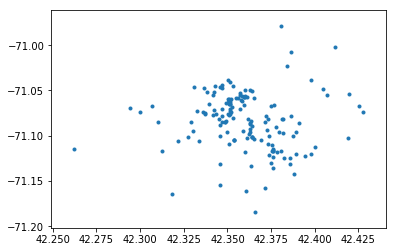

In [89]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [100]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [101]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [102]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       1, 1, 0, 1, 3, 0, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 3, 2, 3, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 3, 1, 1, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 0, 0, 1, 0,
       0, 0, 0], dtype=int32)

In [103]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 42.35356955, -71.06591219],
       [ 42.37240306, -71.11445199],
       [ 42.40451222, -71.03496279],
       [ 42.3121486 , -71.09865045]])

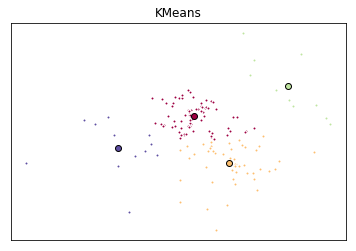

In [104]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

ax.set_xticks(())

ax.set_yticks(())

plt.show()

In [105]:
Y = df10[['lat', 'lng']] .values
Y[0:5]

array([[ 45.45752407, -73.46486638],
       [ 45.47218276, -73.47017081],
       [ 45.501444  , -73.570461  ],
       [ 45.50616778, -73.55436849],
       [ 45.50109904, -73.57684796]])

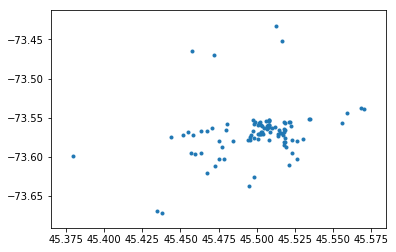

In [106]:
plt.scatter(Y[:, 0], Y[:, 1], marker='.')

In [128]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [129]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

In [130]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 45.46222268, -73.5983214 ],
       [ 45.51148747, -73.56053229]])

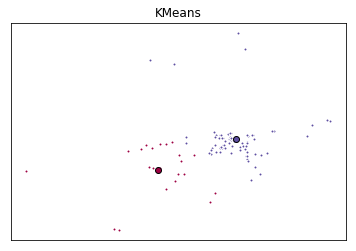

In [131]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    
    cluster_center = k_means_cluster_centers[k]

    ax.plot(Y[my_members, 0], Y[my_members, 1], 'w', markerfacecolor=col, marker='.')

    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

ax.set_xticks(())

ax.set_yticks(())

plt.show()